# Homework 4: Natural Language Processing

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'shruthis'

In [353]:
collaborators = ['iviev', 'austinam', 'mcsant', 'dimac']

# Download the data:
We will be using a subset of the data from [Project Gutenberg](http://www.gutenberg.org).

>Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. Most of the items in its collection are the full texts of public domain books. The project tries to make these as free as possible, in long-lasting, open formats that can be used on almost any computer., Project Gutenberg reached 57,000 items in its collection of free eBooks.

We will use a [cleaned up corpus](https://github.com/aparrish/gutenberg-dammit) that was processed by [Allison Parish](https://www.decontextualize.com/). This processing step was done to standardize metadata and text encoding. The dataset is described on the [project page](https://github.com/aparrish/gutenberg-dammit#gutenberg-dammit). Note that there are plain text files withing subdirectories numbered with the first three digits of the document ID, and there is also a JSON file of document metadata with title, author, and other information.


We created a reduced subset of 4000 documents for the purpose of this assignment that can be downloaded below:

https://drive.google.com/file/d/1V5ep_5veAccCD-YxGlVfv3DsXczBIvv5/view?usp=sharing

This ZIP file is approximately 550 MB compressed, and 1.45 GB uncompressed.

## Q1. (10 pts.) Data cleaning
- (3 pts.) Import the downloaded data
- (2 pts.) Convert to lowercase
- (2 pts.) Remove stopwords 
- (2 pts.) Remove punctuation and any other non-alphabet characters

In [2]:
# ! conda install -y spacy

In [260]:
import pandas as pd
import numpy as np
import re
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import json
import spacy
import os
from spacy.lang.en.stop_words import STOP_WORDS
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruthisubramaniam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
nlp = spacy.load('en')


In [144]:
gutenberg_df = pd.read_json('gutenberg-dammit-files/gutenberg-metadata.json')
gutenberg_df.sort_values("Num").head()

,Author,Author Birth,Author Death,Author Given,Author Surname,Copyright Status,Language,LoC Class,Num,Subject,Title,charset,gd-num-padded,gd-path,href
3093,"[Joseph Smith, Church of Jesus Christ of Latte...","[1805, ?]","[1844, ?]","[Joseph, ?]","[Smith, ?]",[Not copyrighted in the United States.],[English],"[BX: Philosophy, Psychology, Religion: Christi...",17,"[Mormons, Religion]",[The Book of Mormon],us-ascii,17,000/00017.txt,/1/17/17.zip
987,[United States. Central Intelligence Agency],[?],[?],[?],[?],[Not copyrighted in the United States.],[English],"[G: Geography, Anthropology, Recreation]",48,"[Political statistics -- Handbooks, manuals, e...",[The 1992 CIA World Factbook],utf-8,48,000/00048.txt,/etext93/world192.zip
120,[Jean Armour Polly],[?],[?],[Jean Armour],[Polly],[Copyrighted work. See license inside work.],[English],[QA: Science: Mathematics],56,"[United States, National Research and Educatio...",[NREN],us-ascii,56,000/00056.txt,/etext93/nren210.zip
731,[Edgar Rice Burroughs],[1875],[1950],[Edgar Rice],[Burroughs],[Not copyrighted in the United States.],[English],[PS: Language and Literatures: American and Ca...,64,"[Mars (Planet) -- Fiction, Science fiction]",[The Gods of Mars],us-ascii,64,000/00064.txt,/6/64/64.zip
2797,[Canada],[?],[?],[?],[?],[Not copyrighted in the United States.],[English],"[KDZ: Law in general, Comparative and uniform ...",89,"[Free trade -- United States, Free trade -- Me...","[North American Free Trade Agreement, 1992 Oct...",ibm437,89,000/00089.txt,/etext93/naftannx.zip


In [147]:
folders = []
for filename in os.listdir('gutenberg-dammit-files'):
    folders.append(filename)
# print(folders)

# for filename in os.listdir('path/to/dir'):
#     if filename.endswith('.log'):
#         with open(os.path.join('path/to/dir', filename)) as f:
#             content = f.read()
txt_list = []
directory = 'gutenberg-dammit-files'
for folder in folders:
    if folder != ".DS_Store":
        if folder != "gutenberg-metadata.json":
            path = directory + "/" + folder
    #     print(path)
            for filename in os.listdir(path):
                if filename.endswith('.txt'):
                    with open(os.path.join(path, filename)) as f:
                        content = f.read()
                        txt_list.append(content)
txt_list_sample = txt_list[0:5]
print(txt_list_sample[0])

THE DAUGHTER OF THE COMMANDANT

A Russian Romance

by

ALEXKSANDR POUSHKIN

Translated by Mrs. Milne Home

Authoress of "Mamma's Black Nurse Stories," "West Indian Folklore"







PREFACE.


ALEXKSANDR POUSHKIN, the Poet, was born at Petersburg in 1799 of good
family, and died before he was forty, in the prime of his genius. The
novel here offered to the public is considered by Russians his best
prose work. Others are _Boris Godúnof_, a dramatic sketch, but never
intended to be put on the stage, and _The Prisoner of the Caucasus_.
Among his poems are "The Gipsies," "Rúslan and Ludmilla," "The Fountain
of Tears," and "Evgeni Onéghin." The last, if I mistake not, was
translated into English some years ago. Some of Poushkin's writings
having drawn suspicion on him he was banished to a distant part of the
Empire, where he filled sundry administrative posts. The Tzar Nicholai,
on his accession in 1825, recalled him to Petersburg and made him
Historiographer. The works of the poet were much

In [133]:
file_lower = []

for file in txt_list:
    file = file.replace(os.linesep, " ")
    file_lower.append(file.lower())

print(len(file_lower))


4000


The list file_lower is a list of the data converted to lowercase.

In [134]:
file_lower_punct = [''.join(c for c in s if c not in string.punctuation) for s in file_lower]
print(len(file_lower_punct))


4000


In [137]:
file_lower_punct = [''.join(c for c in s if c not in string.digits) for s in file_lower_punct]
print(len(file_lower_punct))


4000


The list file_lower_punct is a list of the data with punctuation and numbers removed.

In [179]:
from nltk.corpus import stopwords
file_lower_punct_stop = []
for thing in file_lower_punct:
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', thing)
    file_lower_punct_stop.append(text)
print(len(file_lower_punct_stop))

4000


The list file_lower_punct_stop is a list of the data without punctuation, numbers, or stop words.

## Q2. (10 pts.) Frequency of Part of Speech (POS) tags
- Use spaCy
  - Use the original (or uncleaned) documents. spaCy does POS tagging better when the sentence is more complete. 
- (4 pts.) Extract POS tags from the first 100 sentences of selected 5 books. 
- (4 pts.) Plot the frequency of POS tags
- (2 pts.) Provide your interpretation

In [149]:
doc = nlp(txt_list_sample[0])
sentences = [sent.string.strip() for sent in doc.sents][:100]
minidoc = nlp(' '.join(sentences))
token_list1 = []
for i, sent in enumerate(doc.sents):
    for token in sent:
        t = (token.pos_)
        token_list1.append(t)
# token_list1


In [150]:
Counter(token_list1)

Counter({'DET': 3747,
         'NOUN': 7235,
         'ADP': 4815,
         'PROPN': 2173,
         'SPACE': 3735,
         'ADJ': 4013,
         'VERB': 8596,
         'PUNCT': 8741,
         'PART': 1275,
         'NUM': 293,
         'CCONJ': 1501,
         'PRON': 4199,
         'ADV': 2580,
         'SYM': 7,
         'INTJ': 132,
         'X': 11})

In [151]:
doc = nlp(txt_list_sample[1])
sentences = [sent.string.strip() for sent in doc.sents][:100]
minidoc = nlp(' '.join(sentences))
token_list2 = []
for i, sent in enumerate(doc.sents):
    for token in sent:
        t = (token.pos_)
        token_list2.append(t)
# token_list2

In [131]:
Counter(token_list2)

Counter({'DET': 5823,
         'PROPN': 3077,
         'PUNCT': 11099,
         'NOUN': 8604,
         'ADV': 4210,
         'SPACE': 4709,
         'CCONJ': 1287,
         'ADP': 5789,
         'VERB': 12140,
         'X': 2,
         'ADJ': 3566,
         'NUM': 224,
         'PRON': 4648,
         'PART': 1749,
         'INTJ': 222})

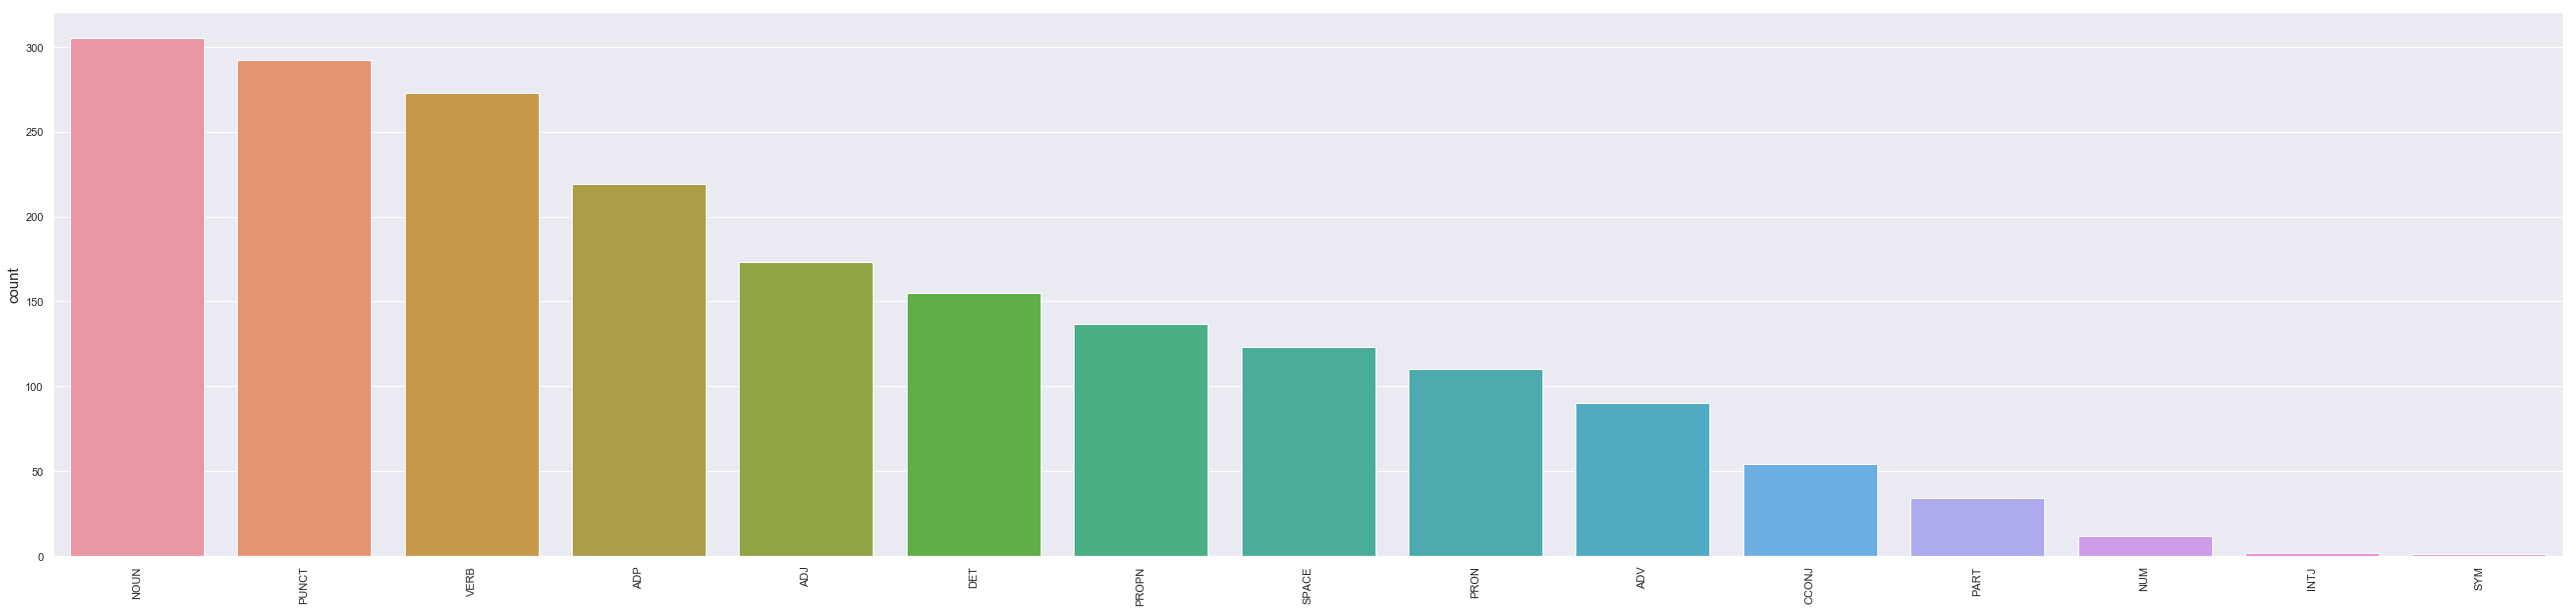

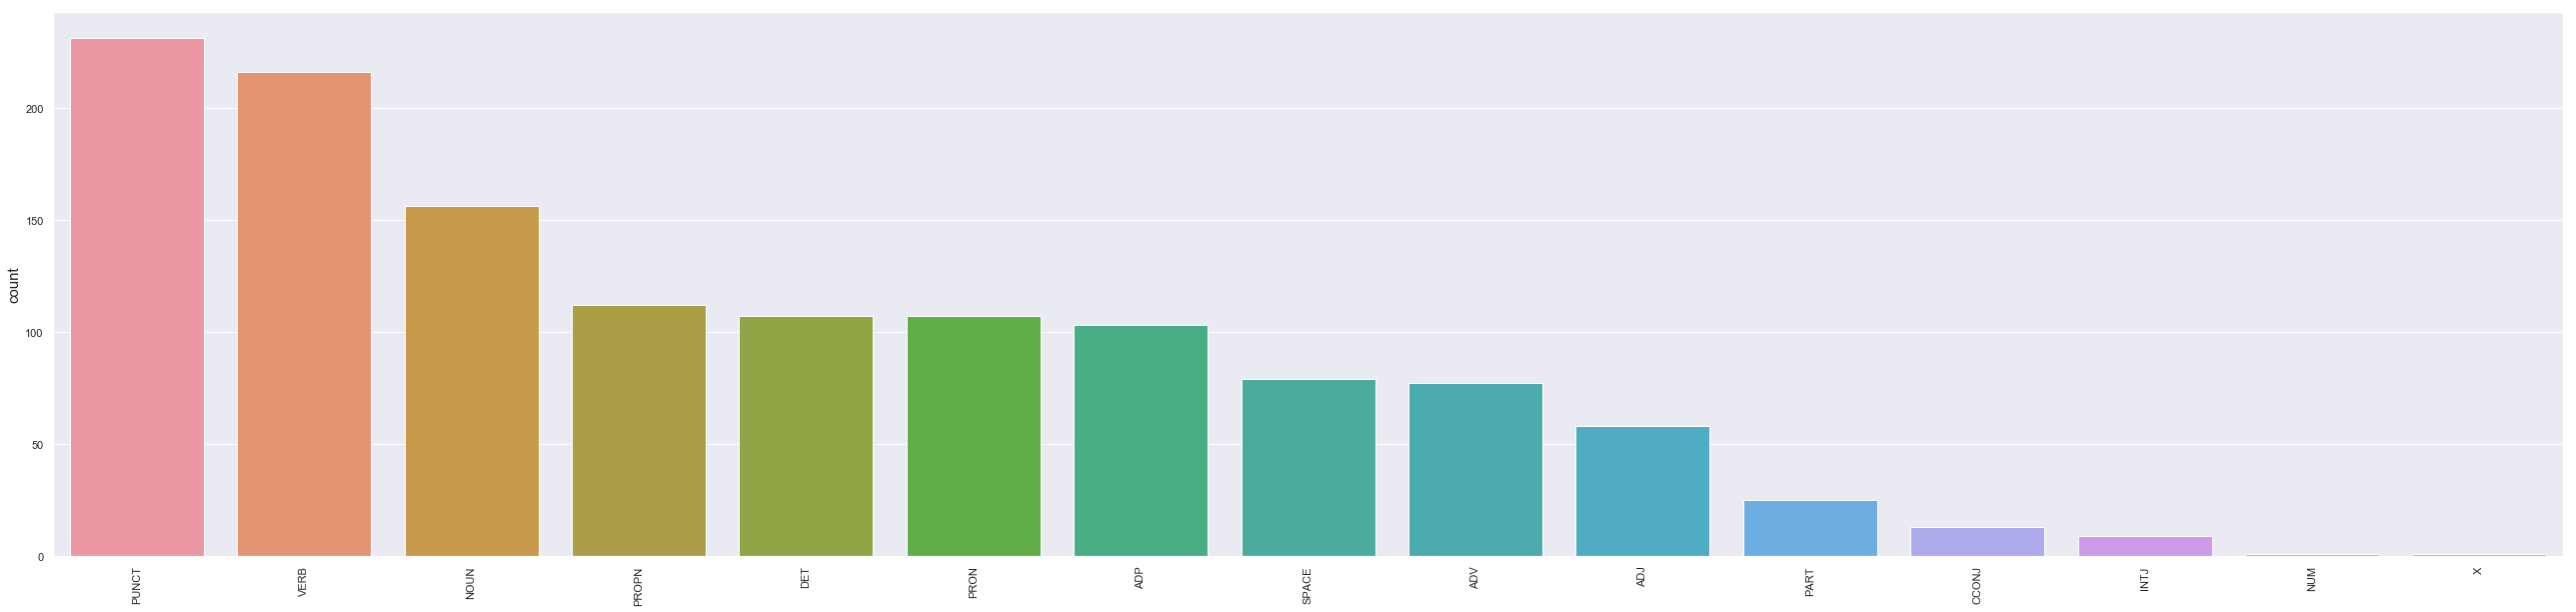

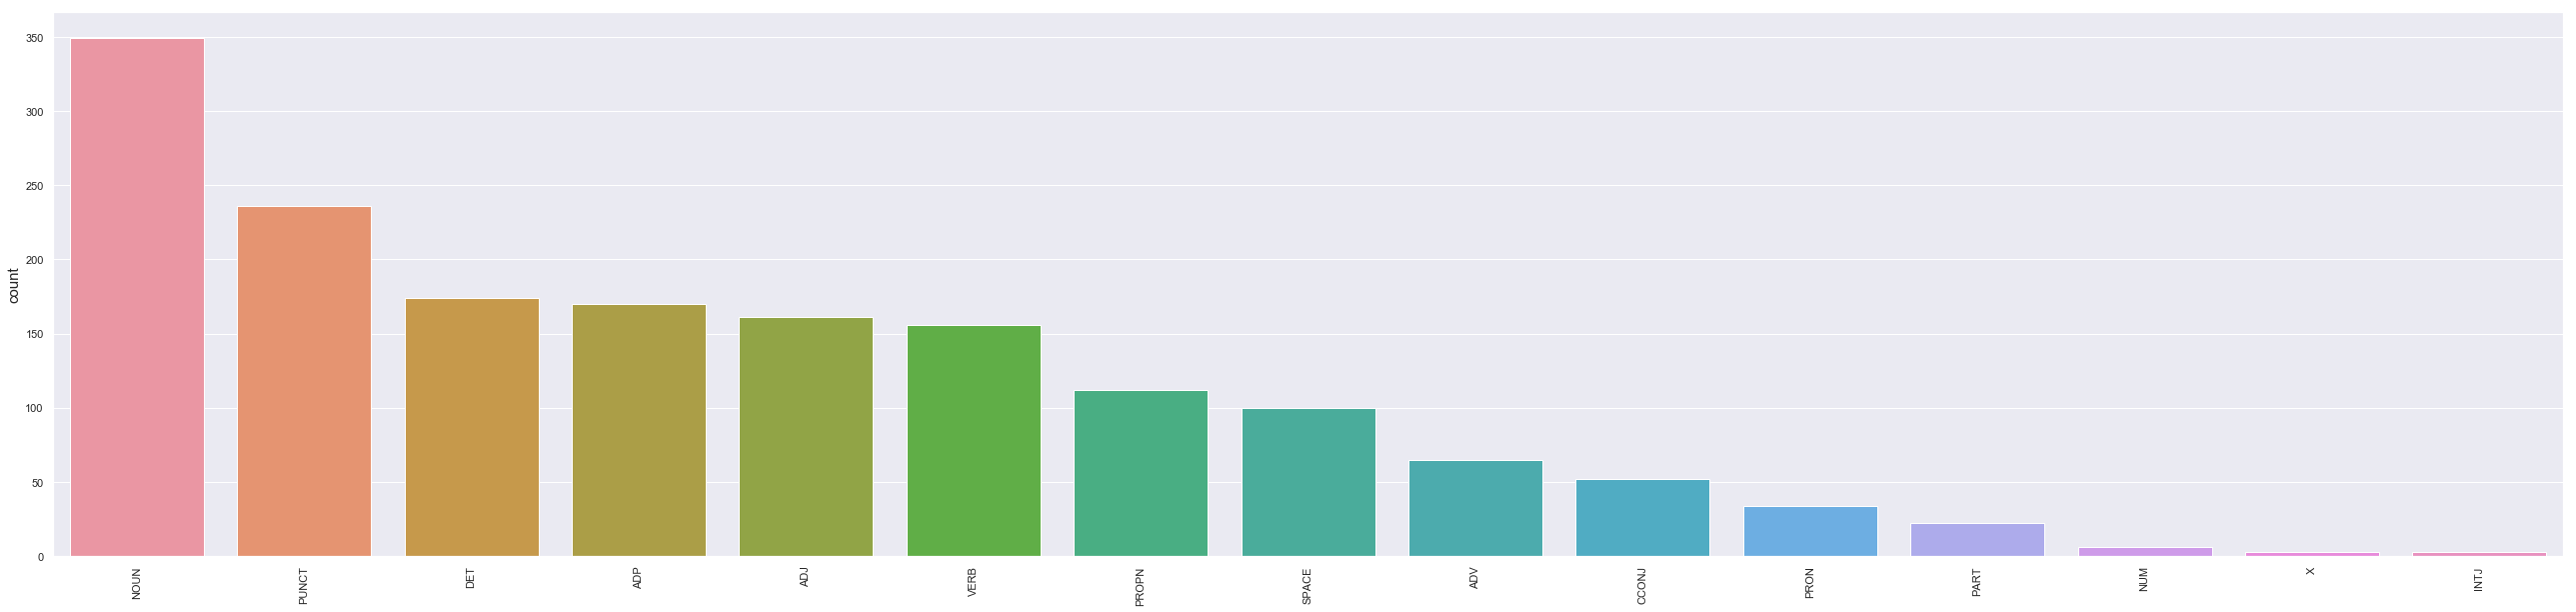

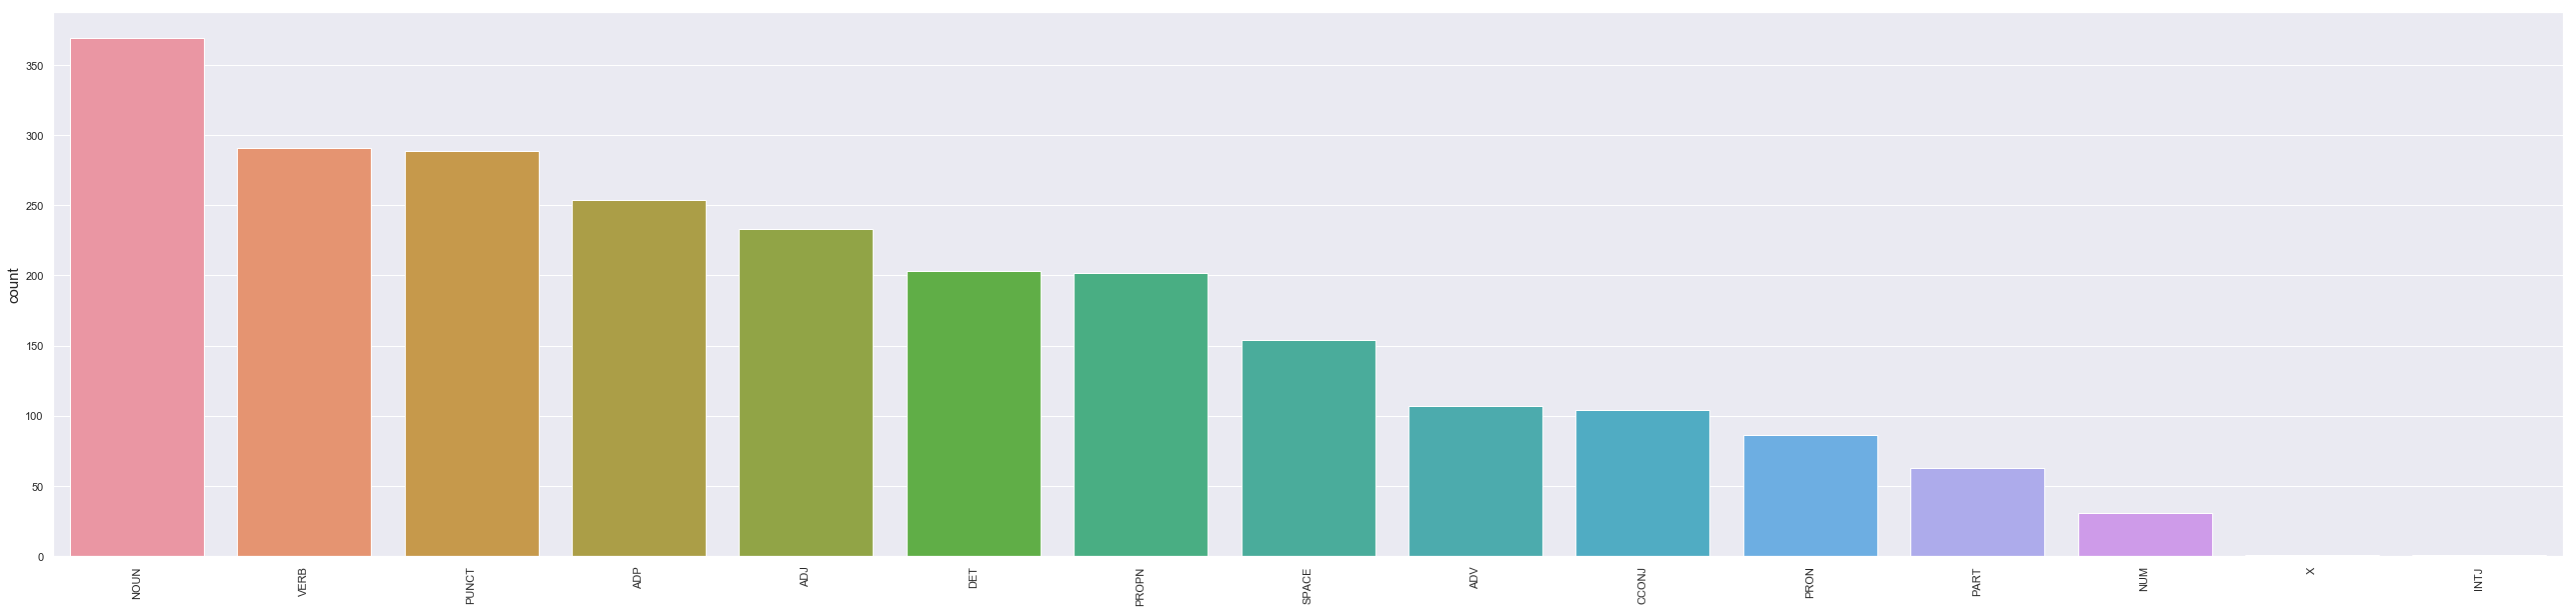

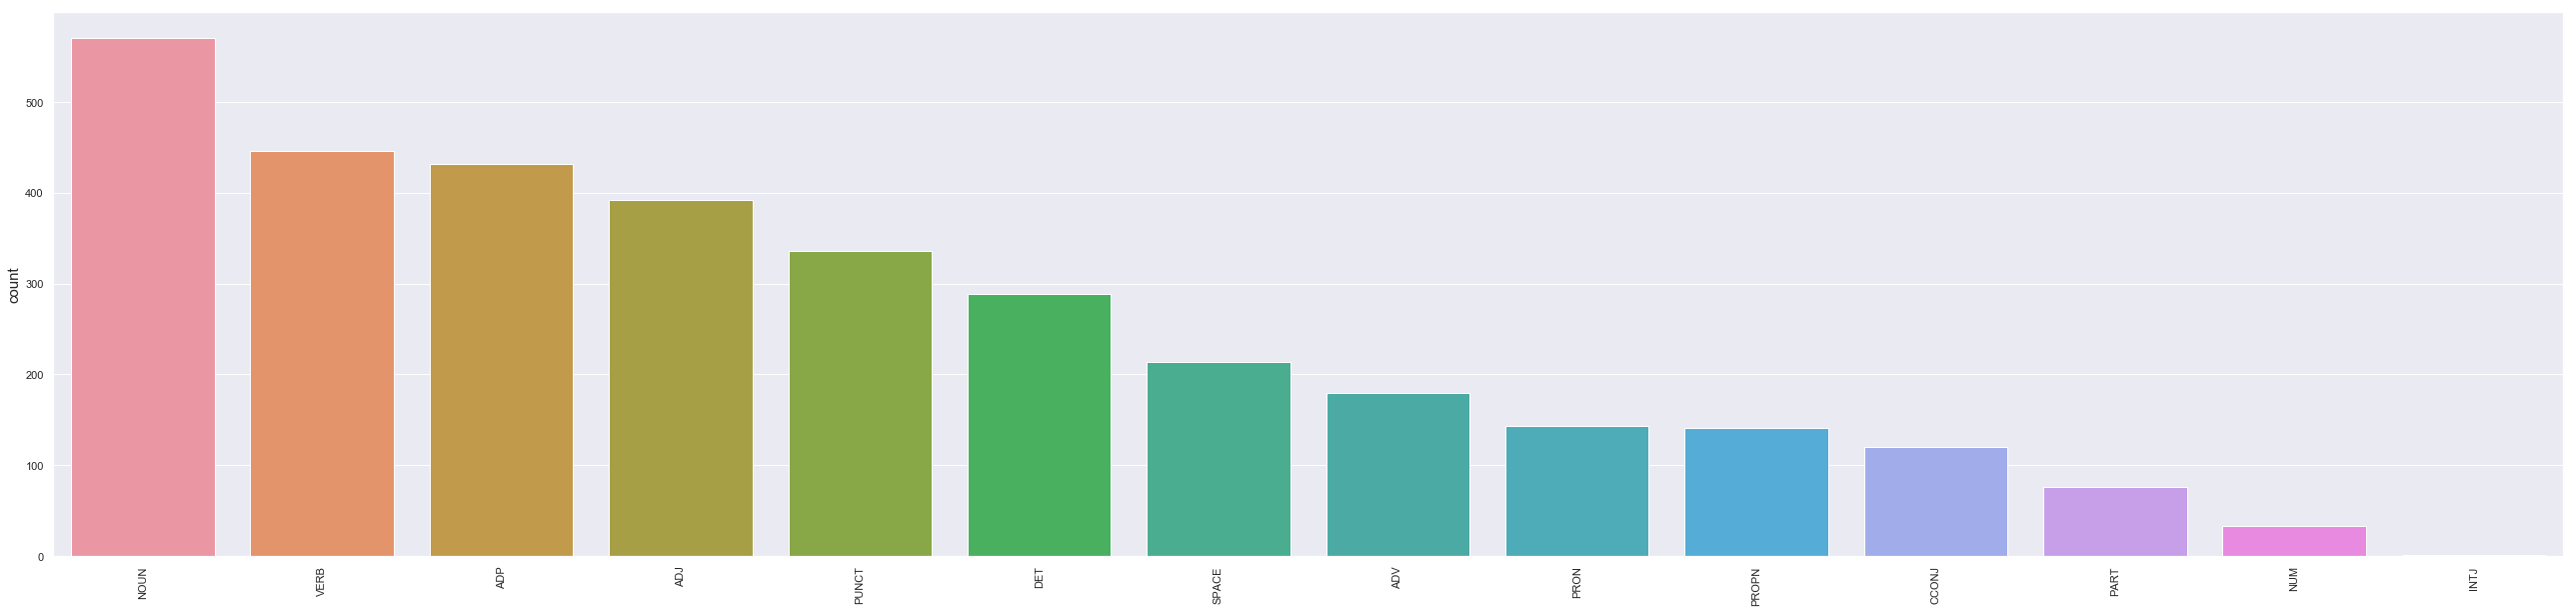

In [361]:
five_books = txt_list_sample
for book in five_books:
    doc = nlp(book)
    sentences = [sent.string.strip() for sent in doc.sents][:100]
    minidoc = nlp(' '.join(sentences))
    #minidoc.sents
    lst = []
    for i, sent in enumerate(minidoc.sents):
        for token in sent:
            tk = token.text, "\t", token.pos_
            lst.append(tk[2])
    Counter(lst).most_common()
    plt.figure(figsize=(45,10))
    sns.countplot(lst, order=pd.Series(lst).value_counts().index)
    # sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
    plt.xticks(rotation=90)
    plt.show()
    

The plots of the frequency of POS tags for each of the 5 chosen chapters showed several interesting characteristics. For the first and third chapters, the most frequent POS tags were Noun and Punctuation. In the second chapter, Punctuation and Verb were the most common POS tags. For the fourth and fifth chapter, Noun and Verb were the most common POS tags respectively. In general across all 5 chapters, Nouns, Verbs, and Punctuation were most common, while Interjections, Numbers, and "other" were the least common POS tags across all chapters.

## Q3. (10 pts.) Make wordclouds for 5 books
- Use the [```word_cloud```](https://github.com/amueller/word_cloud) package.
- (8 pts.) Create a wordcloud for 5 books that you choose.
  - The author of each book should be different.
- (2pts.) Provide your interpretation.

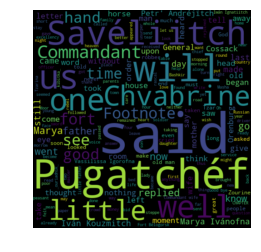

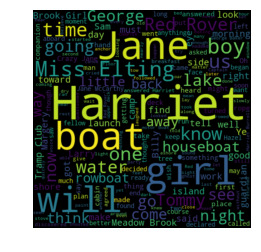

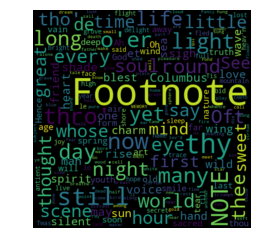

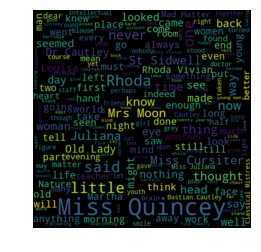

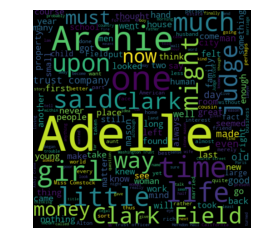

In [158]:

# Create a list of word

for book in five_books:
    # Create the wordcloud object
    wordcloud = WordCloud(width=480, height=480, margin=0).generate(book)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()


Using the dataframe above, I verified that the authors of each of the above 5 books were different. The word clouds depict the frequency of various words in each book, so the larger the size of the word in the wordcloud, the more frequent the word appears in the book, and the smaller the size of the word in the wordcloud, the less frequent the word appears in the book. In chapter one, the most common words were Pugatchef and Said. In chapter two, the most common words were Harriet, Jane, and Boat. In chapter three, the most common words were Footnote, Note, and Thee. In chapter four, the most common words were Miss Quincey and Little. And in chapter five, the most common words were Adelle and Archie.

## Q4. (bonus 5 pts.) Train your own word2vec vector.
- Use the ```gensim``` package
  - Your input will be the output from Q1 (cleaned data)
- Hint: You can look into this tutorial for training the new Word2Vec model: https://rare-technologies.com/word2vec-tutorial/
- Use default parameters when you train the Word2Vec model (e.g., ```min_count```, ```size```, etc.), except the number of workers (```workers=?```) parameter.
- Use this model for the later questions. 
  - **If you do not have your Word2Vec model, please use the pre-trained model that we used for the lab to answer the later questions**

## Q5. (10 pts.) Similarity from Word2Vec 
- Choose 5 words
- (5pts.) What are the top-10 similar words of each?
- (5pts.) Do you find anything odd or interesting? Please explanation. 
  - (if you have your own word2vec model)How the results are different from the pre-trained model that we used in the lab?

In [160]:
! conda install -y gensim

Solving environment: done

## Package Plan ##

  environment location: /Users/shruthisubramaniam/anaconda3/envs/si618

  added / updated specs: 
    - gensim


The following NEW packages will be INSTALLED:

    boto3:           1.9.21-py36_0                    
    botocore:        1.12.23-py36_0                   
    gensim:          3.4.0-py36h1de35cc_0             
    jmespath:        0.9.3-py36_0                     
    s3transfer:      0.1.13-py36_0                    
    smart_open:      1.7.1-py36_0                     

The following packages will be DOWNGRADED:

    ca-certificates: 2018.10.15-ha4d7672_0 conda-forge --> 2018.03.07-0     
    certifi:         2018.10.15-py36_1000  conda-forge --> 2018.10.15-py36_0
    openssl:         1.0.2p-h470a237_1     conda-forge --> 1.0.2p-h1de35cc_0

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [161]:
import gensim
# from https://github.com/eyaler/word2vec-slim
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)

In [163]:
w2v_mod.most_similar('puppy')

[('pup', 0.8287646174430847),
 ('puppies', 0.8270493745803833),
 ('dog', 0.8106428384780884),
 ('kitten', 0.7805572748184204),
 ('pooch', 0.7586283683776855),
 ('Pomeranian', 0.7346876859664917),
 ('Sheltie', 0.7084857821464539),
 ('cat', 0.7075453400611877),
 ('Puppy', 0.7024075984954834),
 ('beagle', 0.7017557621002197)]

In [164]:
w2v_mod.most_similar('book')

[('tome', 0.7485831379890442),
 ('books', 0.7379177808761597),
 ('memoir', 0.730292797088623),
 ('autobiography', 0.6741527318954468),
 ('memoirs', 0.6505153179168701),
 ('Book', 0.6479282379150391),
 ('paperback', 0.6471226811408997),
 ('novels', 0.6341458559036255),
 ('hardback', 0.6283079385757446),
 ('cookbook', 0.6180881261825562)]

In [165]:
w2v_mod.most_similar('noodle')

[('noodles', 0.7218667268753052),
 ('udon', 0.6287466883659363),
 ('dumpling', 0.6221699714660645),
 ('tofu', 0.6206696629524231),
 ('sushi', 0.6056623458862305),
 ('congee', 0.5975499749183655),
 ('potstickers', 0.5910914540290833),
 ('lumpia', 0.5850100517272949),
 ('satays', 0.5827884674072266),
 ('vermicelli', 0.580007791519165)]

In [172]:
w2v_mod.most_similar('halloween')

[('Halloween', 0.6974978446960449),
 ("Hallowe'en", 0.6456753611564636),
 ('christmas', 0.54245924949646),
 ('santa', 0.5107404589653015),
 ('disney', 0.506690502166748),
 ('xmas', 0.5044945478439331),
 ('spooky', 0.4931911826133728),
 ('goblins', 0.4911686182022095),
 ('ghouls', 0.4873771071434021),
 ('mondays', 0.4839852452278137)]

In [176]:
w2v_mod.most_similar('Shruthi')

[('Sowmya', 0.7313432097434998),
 ('Swathi', 0.7278462648391724),
 ('Gayathri', 0.7276651263237),
 ('Pooja', 0.7237797975540161),
 ('Sruthi', 0.7199568748474121),
 ('Swetha', 0.7170770168304443),
 ('Lavanya', 0.714627206325531),
 ('Ramya', 0.7125531435012817),
 ('Pallavi', 0.7114982604980469),
 ('Sandhya', 0.7092299461364746)]

The 10 most similar words to each of my chosen words (puppy, book, noodle, halloween, and laptop) are listed below each word, along with the cosine similarity scores for each word. There are some interesting characteristics for each word. For the word puppy, similar words extend to other types of domestic pets, both young (kitten) and old (cat), and some specific breeds were also included. The word Book had expected similar words, such as other types of books, and different types of print. The similar words for the word noodle was interesting in that they all appeared related to Japanese/Thai food, which does not initially seem indicated by the word "noodle". The word Halloween showed similar words that were related to other holidays, and also strangely included the word Mondays, which was odd. Lastly, the 10 words that were similar to my name, Shruthi, were interestingly noted to all be Indian names. Even more interestingly, half of those names are the names of my cousins!

## Q6. (15 pts.) Similarity between chapters 
- (5 pts.) Pick 5 chapters from the dataset and describe.
  - Each "chapter" consists of 10 consecutive paragraphs from a single book.
  - The author of each chapter should be different.
  - If necessary, explain how you defined "paragraph". 
- (5 pts.) Calculate the average of vectors for the words included in a chapter.  
  - In this way, you can have a vector that can roughly summarize the contents.    
  - The average vector should have the same dimensionality with word vectors 
    - e.g., if the word vector is a 100 dimension, the average vector for paragraph should be a 100 dimension as well
  - Words should come from the results of Q1 (cleaned out data) (i.e. should not contain stopwords or other special characters).
- (5 pts.) Calculate the similarity between chapters.  
  - Provide your interpretation. 
  - Why do you think some chapters are similar/dissimilar to others?

In [219]:
txt_split_list = []
scraped_chapters = []

for txt in txt_list_sample:
    txt_sentences_list = []
    txt_paragraph_str = ""
    txt_split = txt.split("\n\n")
    for item in txt_split:
        if "\n" in item:
            txt_sentences_list.append(item)
    chapters = txt_sentences_list[:10]
    for para in chapters:
        txt_paragraph_str = txt_paragraph_str + para
    file = txt_paragraph_str.replace(os.linesep, " ")
    file = file.lower()
    file = re.sub(r'[^\w\s]', '', file)
    file = re.sub(r'[0-9]', '', file)
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    file = pattern.sub('', file)
    scraped_chapters.append(file)

print(scraped_chapters)


[' alexksandr poushkin poet born petersburg good family died forty prime genius novel offered public considered russians best prose work others _boris godúnof_ dramatic sketch never intended put stage _the prisoner caucasus_ among poems gipsies rúslan ludmilla fountain tears evgeni onéghin last mistake translated english years ago poushkins writings drawn suspicion banished distant part empire filled sundry administrative posts tzar nicholai accession recalled petersburg made historiographer works poet much admired society happy domestic life outspoken language made many enemies disgraceful reports purposely spread abroad concerning resulted duel mortally wounded brotherinlaw george danthès death mourned publicly russia contents chapteri    sergeant guards ii   guide iii  little fort iv   duel v    love vi   pugatchéf vii  assault viii unexpected visit ix   parting x    siege xi   rebel camp xii  orphan xiii arrest xiv  trial chapter father andréj petróvitch grineff serving youth count

In [398]:
token_list = []
for chap in scraped_chapters:
    chap_token_list = []
    doc_=nlp(chap)
    for i, token in enumerate(doc_):
        chap_token_list.append((i, token.text, token.idx))
    token_list.append(chap_token_list)
n = 1
for lst in token_list:
    print("chapter " + str(n))
    for i in range(1,6):
        print(lst[-i])
    n += 1
# print(token_list[0][-1])


chapter 1
(440, 'work', 2978)
(439, 'set', 2974)
(438, 'slumbers', 2965)
(437, 'beauprés', 2956)
(436, 'advantage', 2946)
chapter 2
(141, 'warned', 905)
(140, 'remember', 896)
(139, 'happens', 888)
(138, 'anything', 879)
(137, 'ready', 873)
chapter 3
(216, 'faculty', 1496)
(215, 'principles', 1485)
(214, 'leading', 1477)
(213, 'nature', 1470)
(212, 'investigation', 1456)
chapter 4
(217, 'nowhere', 1529)
(216, 'rest', 1524)
(215, 'stream', 1517)
(214, 'colour', 1510)
(213, 'life', 1505)
chapter 5
(1194, 'burst', 8661)
(1193, 'guest', 8655)
(1192, 'greeting', 8646)
(1191, 'scarcely', 8637)
(1190, 'late', 8632)


In [228]:
chapter_averages = []
for chapter in scraped_chapters:
    chapter_lists = []
    chapter_words = chapter.split()
    for word in chapter_words:
        if word not in w2v_mod.vocab:
            continue
        chapter_lists.append(w2v_mod[word])
    one_average = np.average(np.array(chapter_lists), axis=0)
    chapter_averages.append(one_average)
chapter_averages[4]

array([ 1.80463847e-02,  2.32715122e-02,  7.94492755e-03,  2.38845181e-02,
       -1.46971932e-02, -1.94409434e-02,  1.62822101e-02, -3.25952135e-02,
        3.23667973e-02,  3.42437178e-02,  5.71456319e-03, -4.25300449e-02,
       -8.27131793e-03,  1.05385277e-02, -3.48720588e-02,  1.12805786e-02,
        1.20127369e-02,  3.45483199e-02,  3.53910308e-03, -6.99440856e-03,
       -9.59301554e-03,  7.07303686e-03, -4.10121214e-03, -1.00088124e-04,
        1.76382437e-02, -2.14631017e-02, -3.13471220e-02,  2.29565445e-02,
        7.31592067e-03, -1.35606145e-02, -6.06412767e-03, -8.11822433e-03,
       -1.11046769e-02,  4.35725227e-03, -4.44077374e-03, -1.07118804e-02,
        1.77493263e-02, -1.69862378e-02,  7.93448556e-03,  1.99107621e-02,
        3.00263185e-02, -8.63967650e-03,  3.79250236e-02, -1.02687692e-02,
       -4.08061966e-03, -1.35625266e-02, -2.00008582e-02,  1.16573768e-02,
       -4.04668320e-03, -3.72603163e-03,  4.56519820e-06,  1.09282564e-02,
       -6.22992544e-03, -

In [239]:
for i in range(5):
    for n in range(5):
        if i != n and i < n:
            (print(i, n))
            a = chapter_averages[i]
            b = chapter_averages[n]
            print(a.dot(b) / (np.sqrt(np.sum(np.power(a, 2))) * np.sqrt(np.sum(np.power(b, 2)))))

0 1
0.87970227
0 2
0.8806802
0 3
0.85979575
0 4
0.91147715
1 2
0.81456697
1 3
0.78357416
1 4
0.8367692
2 3
0.8578425
2 4
0.8171554
3 4
0.86394155


* The 5 chapters selected for this problem are the same as for the word cloud problem. Again, I used the metadata dataframe to verify that the authors of each chapter are different. The 5 most common words and their word counts for each of the selected chapters are as follows:
    * chapter 1:
        * 'work', 2978
        * set', 2974
        * 'slumbers', 2965
        * 'beauprés', 2956
        * 'advantage', 2946
    * chapter 2
        * 'warned', 905
        * 'remember', 896
        * 'happens', 888
        * 'anything', 879
        * 'ready', 873
    * chapter 3
        * 'faculty', 1496
        * 'principles', 1485
        * 'leading', 1477
        * 'nature', 1470
        * 'investigation', 1456
    * chapter 4
        * 'nowhere', 1529
        * 'rest', 1524
        * 'stream', 1517
        * 'colour', 1510
        * 'life', 1505
    * chapter 5
        * 'burst', 8661
        * 'guest', 8655
        * 'greeting', 8646
        * 'scarcely', 8637
        * 'late', 8632
    * I defined a paragrph as a passage of text that was separated from the next passage by "\n\n", and I spliced on this prior to cleaning the data to identify individual paragraphs. The first 10 consecutive paragraphs were selected to be considered a "chapter".
    
* The average of vectors for the words in each of the 5 chapters are included in the "chapter_averages" list. This is a list of 5 arrays. These averages were calculated based on the cleaned out data (punctuation, numbers, and stop words were removed once again).

* The cosine similarities between chapters are listed above, with the index position of each chapter being compared listed above each score. Surprisingly, all combinations of chapters had cosine similarity scores above 0.8, indicating high similarity between all chapters. This could be due to several reasons -- the chapters could be from books written during the same time period, they could be written on similar topics, or they could all be books from the same genre.


## Q7. (15 pts.) Identify biases in word embeddings
- (8pts.) Which words from the model show the strongest skew along the each bias scales?
  - hint: Look for the interpretable semantic scaling part from the last Lab (Section 2-3)
  - Search for the words from your Word2Vec model that would locate in the scale's each end
    - e.g., which words are more male/female? 
  - Use following semantic scales
    - *Gender (female:male)*
    - *Age (young:old)*
  - Provide your interpretation
- (7pts.) Pick the top 100 similar words with the word *information*. 
  - Plot these words in a 2-dimensional scale. 
  - Each axis is a bias scale from above (gender and age). 
  - Provide your interpretation


In [280]:
from scipy import spatial
 
def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))


In [281]:
scale_female_male = w2v_mod['female'] - w2v_mod['male']


In [285]:
female_words = []
female_words.append(w2v_mod.most_similar(['female'], topn=5))
female_words

[[('male', 0.8405333757400513),
  ('Female', 0.7159764766693115),
  ('females', 0.6656177639961243),
  ('males', 0.5729262828826904),
  ('women', 0.5556280612945557)]]

In [286]:
male_words = []
male_words.append(w2v_mod.most_similar(['male'], topn=5))
male_words

[[('female', 0.8405333161354065),
  ('males', 0.7579617500305176),
  ('females', 0.7030534744262695),
  ('Male', 0.6288970708847046),
  ('Female', 0.5971192121505737)]]

In [292]:
gender_words_sim = pd.DataFrame([cosine_similarity(w2v_mod['male'], w2v_mod['female'] - w2v_mod['male']),
                              cosine_similarity(w2v_mod['Female'], w2v_mod['female'] - w2v_mod['male']),
                              cosine_similarity(w2v_mod['females'], w2v_mod['female'] - w2v_mod['male']),
                                cosine_similarity(w2v_mod['males'], w2v_mod['female'] - w2v_mod['male']),
                              cosine_similarity(w2v_mod['women'], w2v_mod['female'] - w2v_mod['male']),
                                cosine_similarity(w2v_mod['Males'], w2v_mod['female'] - w2v_mod['male'])],
                                index=['male', 'Female', 'females', 'males', 'women', 'Males'], columns=['cos_sim'])
gender_words_sim


,cos_sim
male,-0.282371
Female,0.210463
females,-0.066288
males,-0.327646
women,0.200658
Males,-0.212554


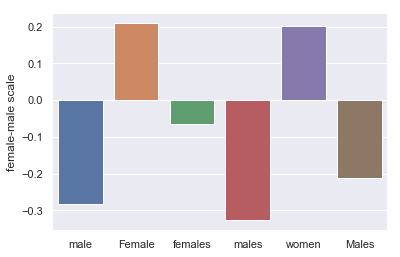

In [294]:
ax = sns.barplot(x=gender_words_sim.index, y=gender_words_sim.cos_sim)
ax.set(ylabel="female-male scale")
plt.show()

In [295]:
young_words = []
young_words.append(w2v_mod.most_similar(['young'], topn=5))
young_words

[[('teenage', 0.6431925296783447),
  ('younger', 0.635094165802002),
  ('teenaged', 0.6070023775100708),
  ('impressionable', 0.5947336554527283),
  ('youth', 0.5715782046318054)]]

In [296]:
old_words = []
old_words.append(w2v_mod.most_similar(['old'], topn=5))
old_words

[[('boy', 0.58281409740448),
  ('daughter', 0.5281769633293152),
  ('son', 0.5190994143486023),
  ('girl', 0.5054707527160645),
  ('olds', 0.5024389624595642)]]

In [297]:
age_words_sim = pd.DataFrame([cosine_similarity(w2v_mod['teenage'], w2v_mod['young'] - w2v_mod['old']),
                              cosine_similarity(w2v_mod['younger'], w2v_mod['young'] - w2v_mod['old']),
                              cosine_similarity(w2v_mod['teenaged'], w2v_mod['young'] - w2v_mod['old']),
                              cosine_similarity(w2v_mod['impressionable'], w2v_mod['young'] - w2v_mod['old']),
                              cosine_similarity(w2v_mod['youth'], w2v_mod['young'] - w2v_mod['old']),
                              cosine_similarity(w2v_mod['boy'], w2v_mod['young'] - w2v_mod['old']),
                              cosine_similarity(w2v_mod['daughter'], w2v_mod['young'] - w2v_mod['old']),
                              cosine_similarity(w2v_mod['son'], w2v_mod['young'] - w2v_mod['old']),
                              cosine_similarity(w2v_mod['girl'], w2v_mod['young'] - w2v_mod['old']),
                                cosine_similarity(w2v_mod['olds'], w2v_mod['young'] - w2v_mod['old'])],
                                index=['teenage', 'younger', 'teenaged', 'impressionable', 'youth', 
                                       'boy', 'daughter', 'son', 'girl', 'olds'], 
                             columns=['cos_sim'])
age_words_sim

,cos_sim
teenage,0.172451
younger,0.206718
teenaged,0.186082
impressionable,0.316851
youth,0.333430
boy,-0.182156
daughter,-0.244425
son,-0.207494
girl,-0.149849
olds,-0.071232


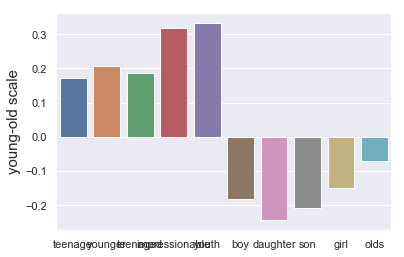

In [322]:

ax = sns.barplot(x=age_words_sim.index, y=age_words_sim.cos_sim)
ax.set(ylabel="young-old scale")
plt.show()


In [354]:
top_100 = w2v_mod.most_similar(positive=['information'], topn=100)
# top100_similar
top100_list = []
for each_info in range(100):
    top100_list.append(w2v_mod.most_similar(positive=['information'], topn=100)[each_info][0])
top100_list

lst_for_pd = []
indx = []
for word in top100_list:
    lst_for_pd.append([cosine_similarity(w2v_mod[word], w2v_mod['female'] - w2v_mod['male'])])
    indx.append(word)
info_words_sim = pd.DataFrame(lst_for_pd, index=indx, columns=['cos_sim'])
info_words_sim.head()

,cos_sim
info,0.037911
informationon,0.032788
Information,-0.005540
details,-0.015221
data,-0.078902


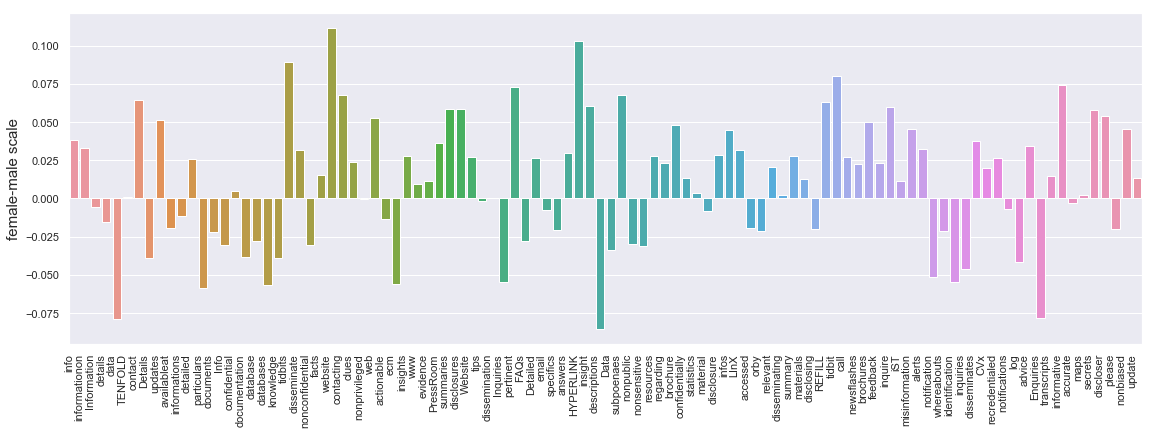

In [402]:

plt.figure(figsize=(16,6)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.barplot(x=info_words_sim.index, y=info_words_sim.cos_sim)
ax.set(ylabel="female-male scale")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [399]:
lst2_for_pd = []
indx = []
for word in top100_list:
    lst2_for_pd.append([cosine_similarity(w2v_mod[word], w2v_mod['young'] - w2v_mod['old'])])
    indx.append(word)
info2_words_sim = pd.DataFrame(lst2_for_pd, index=indx, columns=['cos_sim'])
info2_words_sim.head()

,cos_sim
info,0.054308
informationon,0.046058
Information,-0.013339
details,0.071722
data,0.001518


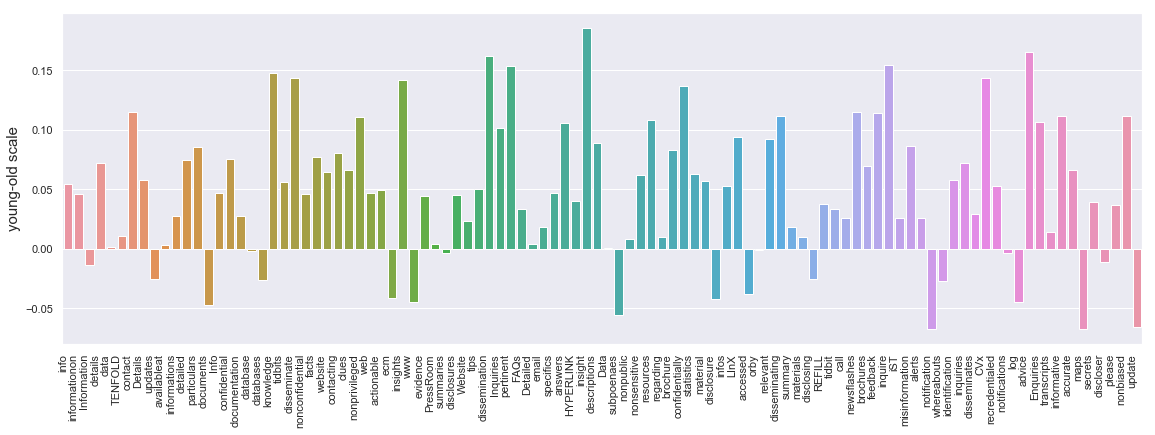

In [403]:

plt.figure(figsize=(16,6)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.barplot(x=info2_words_sim.index, y=info2_words_sim.cos_sim)
ax.set(ylabel="young-old scale")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

* I first searched the model to identify the 5 words most similar to "female" and "male", and "young" and "old", which were used to define the two bias scales. The words that appeared most common for both female and male were [male, males, Female, females, women, and Males"]. When plotting the cosine similarities along the female-male bias scale, Female and women were closer to the "female" end of the scale, while male, males, and Males were closer to the "male" end of the scale. The word females appeared to be located between the two words on the female-male scale.
* I then searched for words most similar to "young" and "old" for my second bias scale. The words identified for both young and old were [teenage, younger, teenaged, impressionable, youth, boy, daughter, son, girl, and olds]. When plotting the cosine similarities for these words along the young-old scale, the first 5 words were understandably closer to the "young" end of the scale, while the last 5 words were closer to the "old" end of the scale. It was odd to note that "girl" and "son" were considered more similar to "old" than "young".
* I then searched for the 100 words most similar to "information", and plotted them along both the gender and age bias scales. These plots are above as well. I was most surprised at the fact that several words were strongly skewed towards either ends of both scales, despite the majority of the words similar to "information" being inanimate and non-gendered. For example, the words website, contacting, and HYPERLINK are significantly skewed towards the "female" end of the scale, while words such as descriptions, Enquiries, and data were skewed towards the "male" end of the scale. Plotting the 100 words along the age-scale revealed similarly significant bias towards both ends of the scale. The majority of the information-similar words were significantly skewed towards the "young" end of the bias scale, such as disseminate, insight, and inquire. Some of the few words most skewed towards the old end of the bias scale were notifications, maps, and update. It is perhaps more understandable that information-related words are closer to the "young" end of the scale, as technology in general is commonly viewed as a young, growing field.



## Q8. (10 pts.) Word clustering
- Pick top-100 similar words with the word *information*.  
- Calculate cosine similarity scores between words
  - e.g., Create a 100x100 matrix that contains cosine similarity scores. Each row and columns should be words. 
- Use seaborn's [```.clustermap()```](https://seaborn.pydata.org/generated/seaborn.clustermap.html) function to draw a hierarchically-clustered heatmap
- Provide your interpretation

In [356]:
# top_100 = w2v_mod.most_similar(positive=['information'], topn=100)
# # top100_similar
# top100_list = []
# for each_info in range(100):
#     top100_list.append(w2v_mod.most_similar(positive=['information'], topn=100)[each_info][0])
# top100_list
similarity_list = []
for i in range(100):
    word_similarities = []
    for n in range(100):
        word_similarities.append(w2v_mod.similarity(top100_list[i], top100_list[n]))
    similarity_list.append(word_similarities)
print(similarity_list[0])


[0.9999999999999998, 0.5437708321878911, 0.39706639711085995, 0.5704100175098628, 0.34690722250644235, 0.4437705299781729, 0.38903605558402987, 0.4809711628531783, 0.5014361301763484, 0.45337927045830306, 0.45945638453859394, 0.3400392660085413, 0.39639655781000194, 0.2707287857928845, 0.5029390808236338, 0.28582945583910224, 0.3229354538215845, 0.27418464137853266, 0.27103209379242366, 0.283734622530148, 0.5134184862505571, 0.23168322035484884, 0.2959299687772304, 0.3177877335359146, 0.41779769072962475, 0.3095759079693283, 0.36822232820895406, 0.1985443535737606, 0.4196780289841341, 0.19972221151001102, 0.3653292554000066, 0.3026608347465807, 0.5369472862597175, 0.23247770718430166, 0.38460633361776997, 0.34682250606792414, 0.2338274624087327, 0.3816146065625655, 0.4314595236119289, 0.19160634722228975, 0.27100303845614426, 0.3339131720908918, 0.5023888035711246, 0.35802910238566443, 0.3835541728776294, 0.3206928590385565, 0.3701641437008452, 0.4605818096039913, 0.29321103340237975, 

In [404]:
matrix = np.reshape(similarity_list, (100, 100))
# matrix
column_names = top100_list
row_names = top100_list
df = pd.DataFrame(matrix, columns=column_names, index=row_names)
df


,info,informationon,Information,details,data,TENFOLD,contact,Details,updates,availableat,...,Enquiries,transcripts,informative,accurate,maps,secrets,discloser,please,nonbiased,update
info,1.000000,0.543771,0.397066,0.570410,0.346907,0.443771,0.389036,0.480971,0.501436,0.453379,...,0.251594,0.218130,0.317617,0.214786,0.321741,0.322509,0.316399,0.477491,0.218569,0.341084
informationon,0.543771,1.000000,0.417734,0.438872,0.320277,0.531088,0.402642,0.405368,0.408649,0.527021,...,0.321985,0.238636,0.320283,0.237753,0.296420,0.176603,0.291068,0.317414,0.253228,0.281295
Information,0.397066,0.417734,1.000000,0.337084,0.371269,0.357362,0.233841,0.421640,0.233407,0.421761,...,0.393524,0.276182,0.140331,0.112876,0.197198,0.161183,0.224050,0.199983,0.147850,0.149125
details,0.570410,0.438872,0.337084,1.000000,0.267909,0.314679,0.324619,0.721666,0.403563,0.325376,...,0.293647,0.288114,0.220828,0.154763,0.253278,0.355164,0.303263,0.302934,0.163573,0.337170
data,0.346907,0.320277,0.371269,0.267909,1.000000,0.184470,0.057502,0.167773,0.285520,0.244271,...,0.137385,0.342926,0.149244,0.268031,0.398754,0.189227,0.257193,0.048890,0.224573,0.244552
TENFOLD,0.443771,0.531088,0.357362,0.314679,0.184470,1.000000,0.387366,0.340418,0.247507,0.544379,...,0.341572,0.135748,0.119289,0.102867,0.121575,0.084292,0.232493,0.436065,0.131300,0.182947
contact,0.389036,0.402642,0.233841,0.324619,0.057502,0.387366,1.000000,0.230731,0.275184,0.276077,...,0.437309,0.076122,0.139891,0.155589,0.063596,0.079415,0.184746,0.387578,0.230851,0.157945
Details,0.480971,0.405368,0.421640,0.721666,0.167773,0.340418,0.230731,1.000000,0.274442,0.431142,...,0.389169,0.196989,0.133106,0.079335,0.177108,0.284099,0.185563,0.239707,0.087219,0.218755
updates,0.501436,0.408649,0.233407,0.403563,0.285520,0.247507,0.275184,0.274442,1.000000,0.326080,...,0.098917,0.155034,0.261941,0.202939,0.324137,0.091716,0.259343,0.266812,0.169857,0.731112
availableat,0.453379,0.527021,0.421761,0.325376,0.244271,0.544379,0.276077,0.431142,0.326080,1.000000,...,0.352286,0.217865,0.316039,0.200510,0.216300,0.031067,0.305726,0.408140,0.257894,0.250294


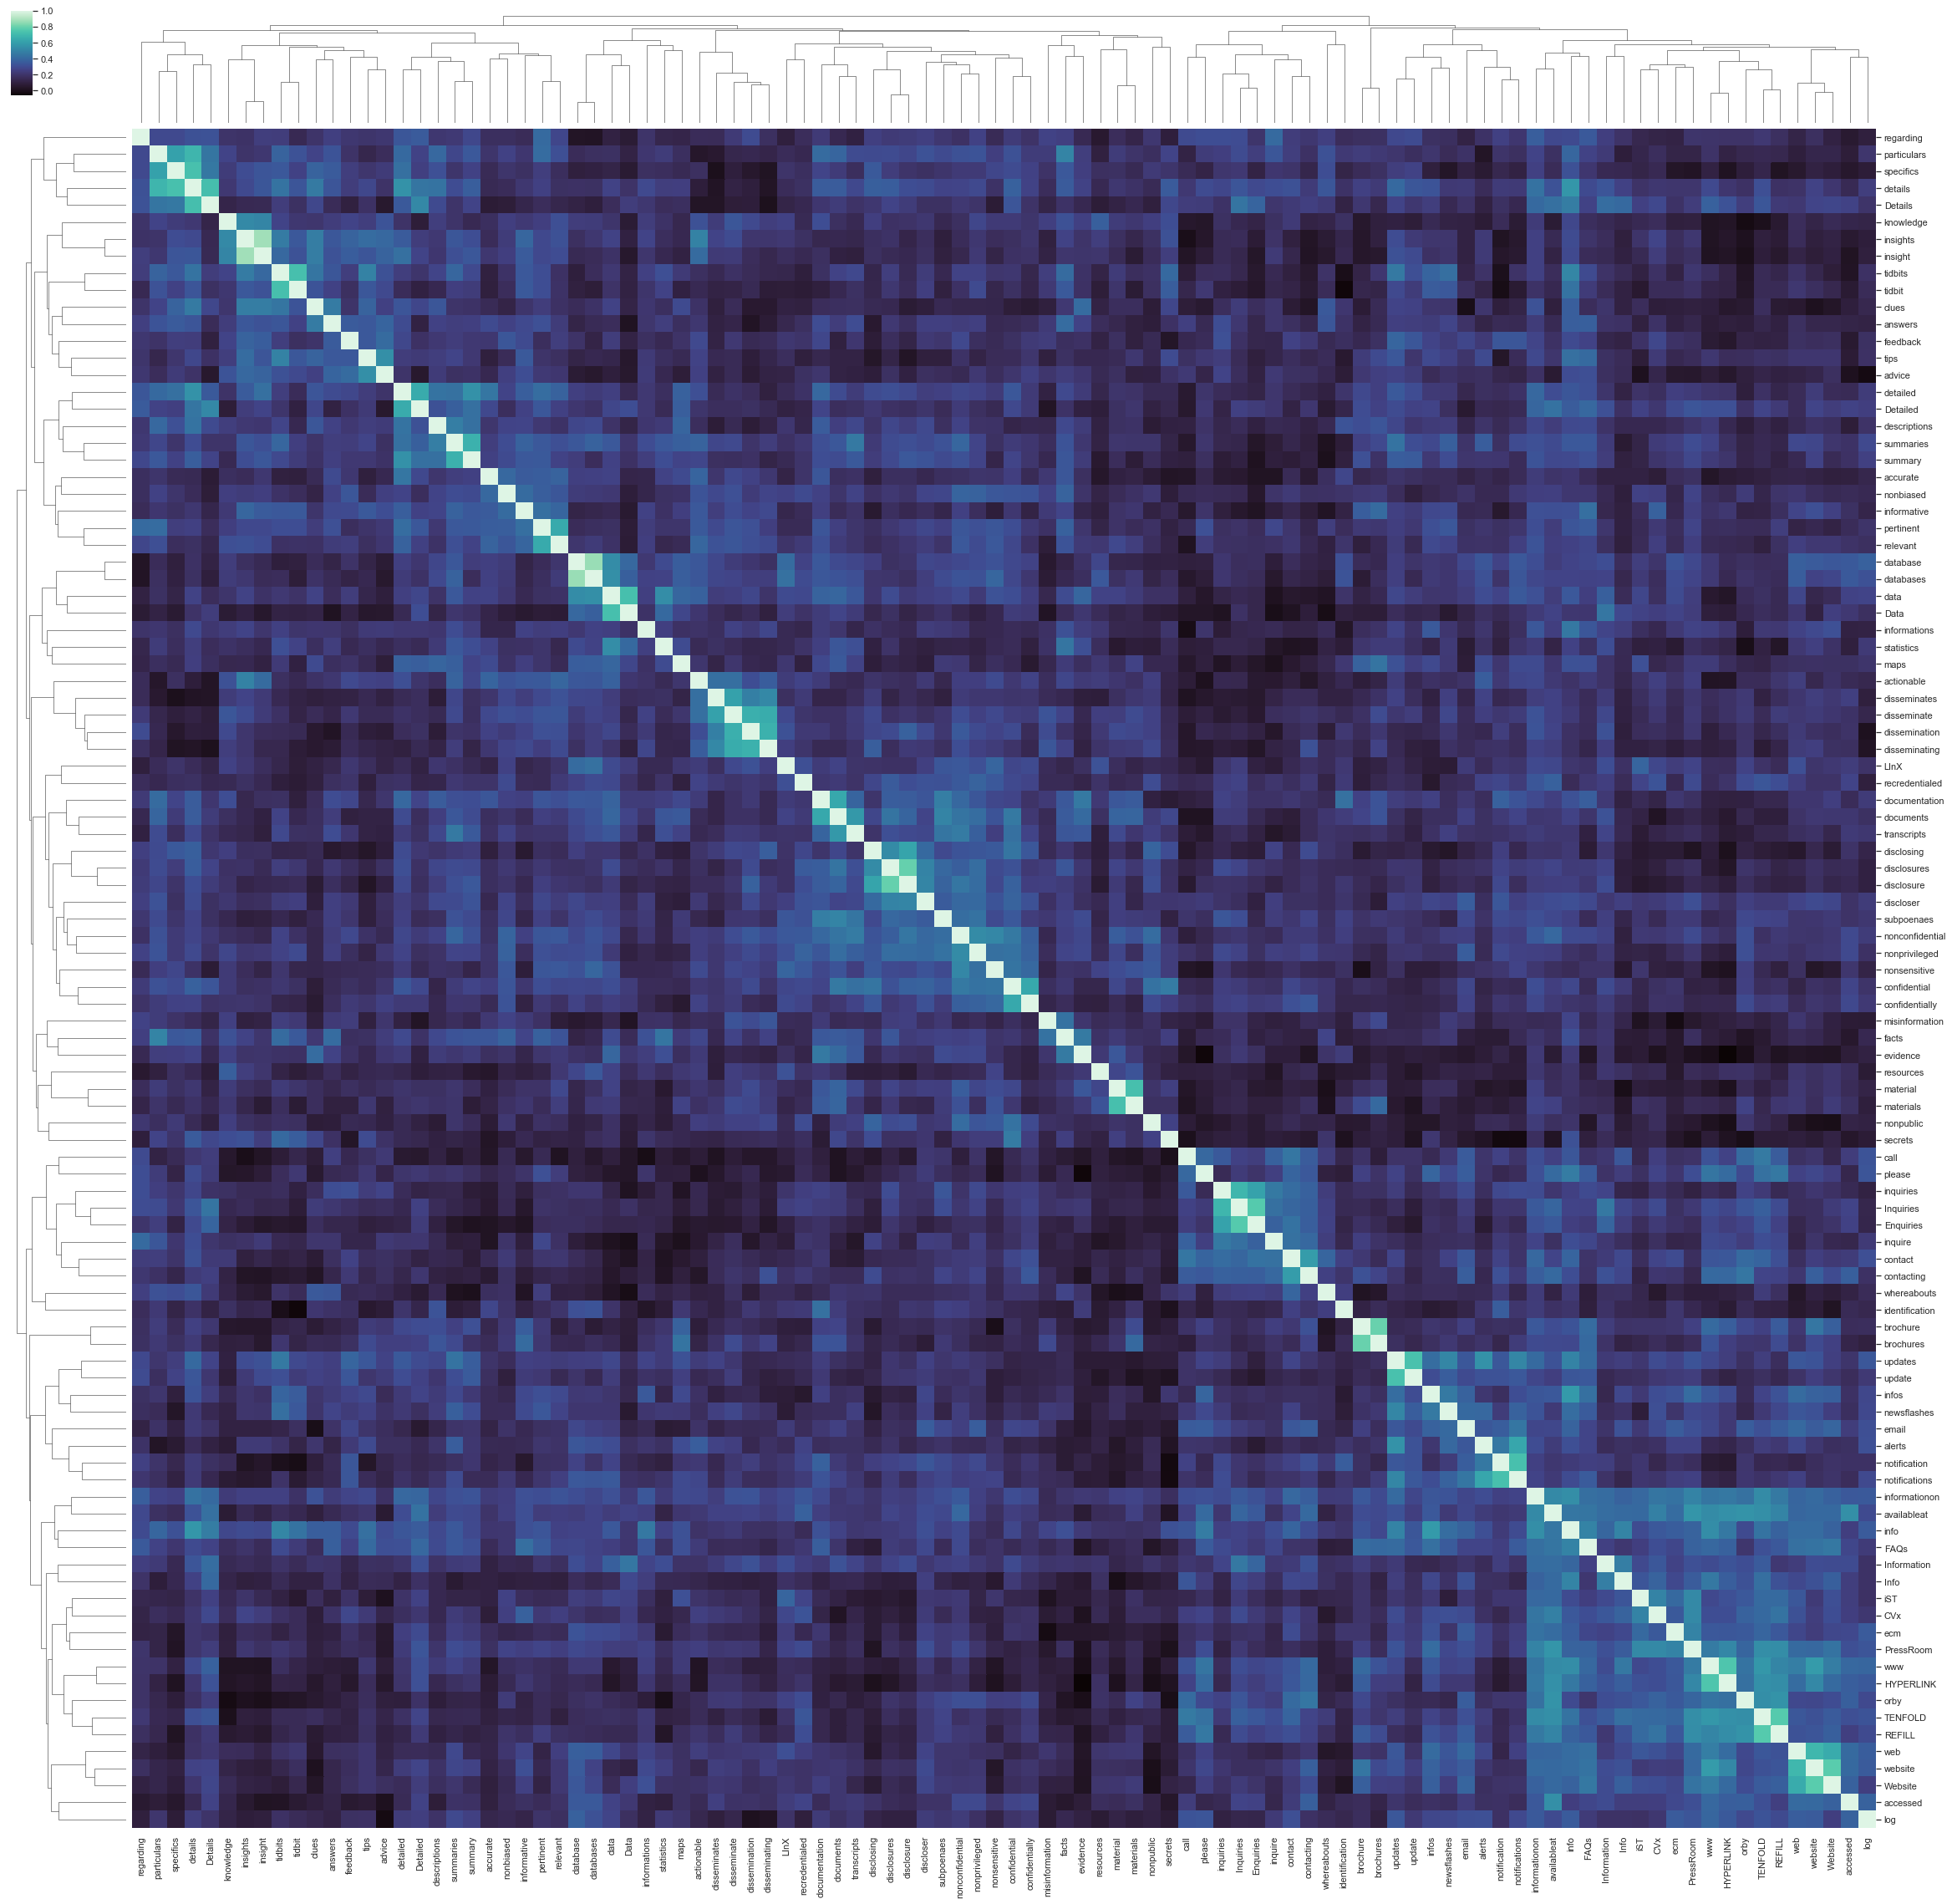

In [405]:
g = sns.clustermap(df, cmap="mako", figsize=(40, 40))
# g.fig


The 100x100 matrix of cosine-similarity scores was stored in the variable "matrix", and was formatted into a dataframe with row and column names included (df). The hierarchically-clustered heatmap indicates that words with lighter shades of blue are more similar to eachother (they have larger cosine similarity scores), and these are notable closest to the diagnol of the plot. The white squares in the diagnol indicate a similarity close to 1 for comparing the same 2 words. Of note, the bottom right end of the graph appears to contain words that are all computer-related, and therefore this section of the heatmap understandably has higher similarities, as indicated by the lighter green-blue squares.

